In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.image import resize

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
938/938 [==============================] - 19s 6ms/step - loss: 0.5362 - accuracy: 0.8030 - val_loss: 0.4017 - val_accuracy: 0.8519
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3406 - accuracy: 0.8768 - val_loss: 0.3254 - val_accuracy: 0.8836
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2910 - accuracy: 0.8953 - val_loss: 0.3014 - val_accuracy: 0.8912
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2598 - accuracy: 0.9055 - val_loss: 0.2852 - val_accuracy: 0.9010
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2369 - accuracy: 0.9126 - val_loss: 0.2814 - val_accuracy: 0.8967
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2187 - accuracy: 0.9196 - val_loss: 0.2609 - val_accuracy: 0.9067
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1996 - accuracy: 0.9261 - val_loss: 0.2656 - val_accuracy: 0.9064
Epoch

In [8]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the target image dimensions (e.g., 64x64)
target_height = 32
target_width = 32
target_channels = 3

In [9]:
# Create empty arrays to store resized and preprocessed images
train_images_resized = np.zeros((train_images.shape[0], target_height, target_width, target_channels))
test_images_resized = np.zeros((test_images.shape[0], target_height, target_width, target_channels))

for i in range(train_images.shape[0]):
    # Convert grayscale image to RGB format
    rgb_image = np.stack((train_images[i], train_images[i], train_images[i]), axis=-1)
    
    # Resize the image to the target dimensions
    resized_image = resize(rgb_image, (target_height, target_width))
    
    # Normalize the pixel values to the [0, 1] range
    resized_image = resized_image / 255.0
    
    train_images_resized[i] = resized_image

for i in range(test_images.shape[0]):
    # Convert grayscale image to RGB format
    rgb_image = np.stack((test_images[i], test_images[i], test_images[i]), axis=-1)
    
    # Resize the image to the target dimensions
    resized_image = resize(rgb_image, (target_height, target_width))
    
    # Normalize the pixel values to the [0, 1] range
    resized_image = resized_image / 255.0
    
    test_images_resized[i] = resized_image

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the smaller target image dimensions
target_height = 32
target_width = 32

# Create an ImageDataGenerator for data augmentation (optional)
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Convert grayscale images to RGB and resize to the smaller dimensions
train_images_resized = np.zeros((train_images.shape[0], target_height, target_width, 3), dtype=np.float32)
for i in range(train_images.shape[0]):
    rgb_image = np.stack((train_images[i], train_images[i], train_images[i]), axis=-1)
    resized_image = tf.image.resize(rgb_image, (target_height, target_width))
    train_images_resized[i] = resized_image / 255.0

test_images_resized = np.zeros((test_images.shape[0], target_height, target_width, 3), dtype=np.float32)
for i in range(test_images.shape[0]):
    rgb_image = np.stack((test_images[i], test_images[i], test_images[i]), axis=-1)
    resized_image = tf.image.resize(rgb_image, (target_height, target_width))
    test_images_resized[i] = resized_image / 255.0

# Convert labels to one-hot encoding (if not already done)
train_labels_onehot = keras.utils.to_categorical(train_labels, 10)  # Assuming 10 classes
test_labels_onehot = keras.utils.to_categorical(test_labels, 10)

# Define the ResNet50 model as previously shown

# Create a data generator for training
train_data_generator = data_generator.flow(train_images_resized, train_labels_onehot, batch_size=32)

# Train the model using the generator
history = model.fit(train_data_generator, epochs=10, steps_per_epoch=len(train_images) // 32)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels_onehot)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


MemoryError: Unable to allocate 703. MiB for an array with shape (60000, 32, 32, 3) and data type float32

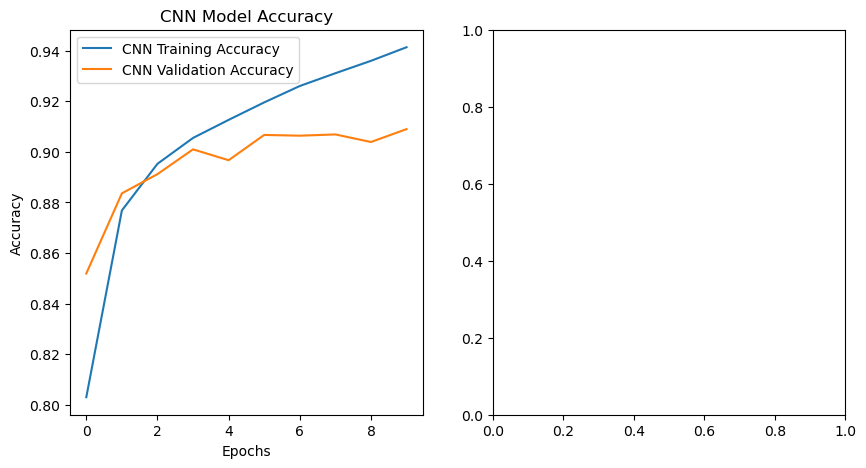

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')

plt.subplot(1, 2, 2)
# Plot the accuracy for the ResNet50 model once it is trained.

plt.show()
